## 2 Getting Started with Image Processing with Python.
### Introduction to Python Imaging Library(PIL)
#### 2.1 Exercise - 1:

Complete all the Task.
1. Read and display the image.
   - Read the image using the Pillow library and display it.
   - You can also use matplotlib to display the image.

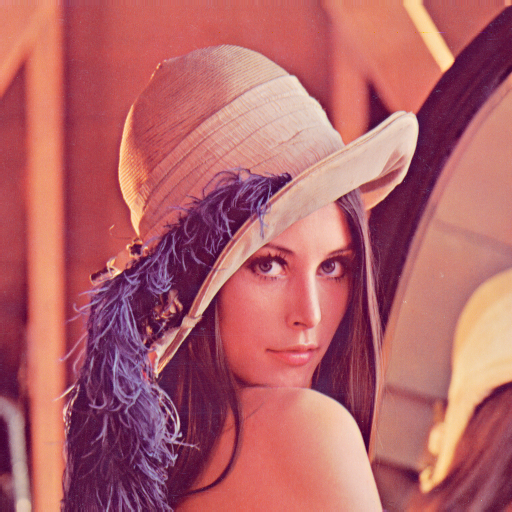

In [1]:
# Import libraries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Accessing image
image = Image.open("/content/drive/MyDrive/AL and ML/Workshop 1/Lenna_(test_image).png")
display(image)

2. Display only the top left corner of 100x100 pixels.
- Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

Shape of the image array: (512, 512, 3)
Accessing the top left corner (100, 100, 3)


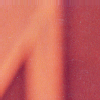

In [2]:
# converting image to array
image_array = np.array(image)

# priting the shape of the image
print("Shape of the image array:", image_array.shape)

# Accessing a specific sub image
top_left_corner = image_array[:100, :100, :]
print("Accessing the top left corner", top_left_corner.shape)

# converting the array back to image object
top_left_image = Image.fromarray(top_left_corner)
display(top_left_image)

3. Show the three color channels (R, G, B).
- Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

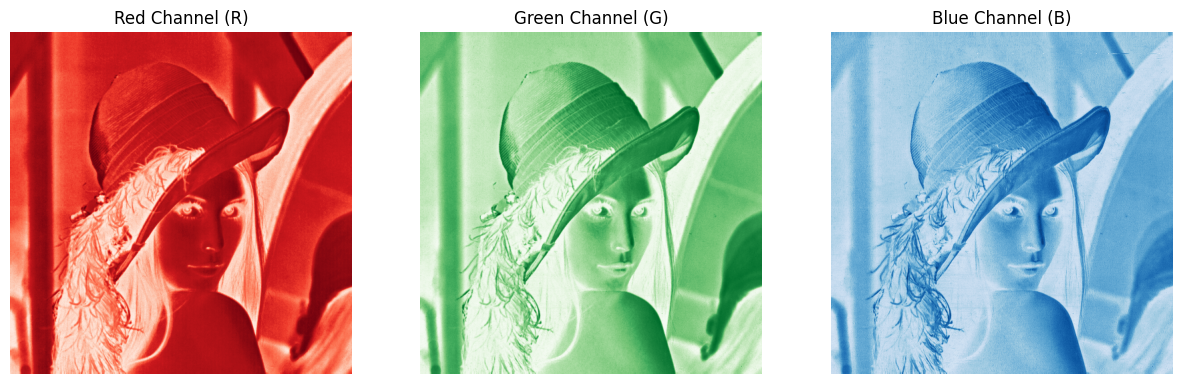

In [3]:
# extracting red channel
R = image_array[:, :, 0]

# extracting green channel
G = image_array[:, :, 1]

# extracting blue channel
B = image_array[:, :, 2]

# Displaying the channels
plt.figure(figsize=(15,5))

# Display for R
plt.subplot(1,3,1)
plt.imshow(R, cmap='Reds')
plt.title("Red Channel (R)")
plt.axis('off')

# Display for G
plt.subplot(1,3,2)
plt.imshow(G, cmap="Greens")
plt.title("Green Channel (G)")
plt.axis('off')

# Display for B
plt.subplot(1, 3, 3)
plt.imshow(B, cmap="Blues")
plt.title("Blue Channel (B)")
plt.axis('off')

# Render the image
plt.show()

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:
- Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

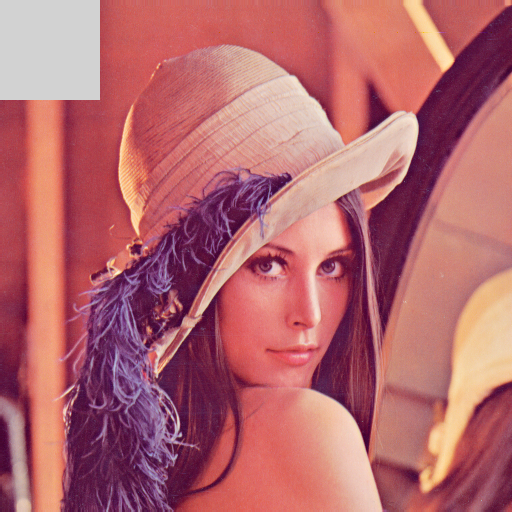

In [4]:
image2 = image
image2_array = np.array(image2)

# modifying top left corner with value of 210
image2_array[:100, :100, :] = 210

converted_image2 = Image.fromarray(image2_array)
display(converted_image2)

#### 2.2 Exercise - 2:
Complete all the Task.


1. Load and display a grayscale image.
- Load a grayscale image using the Pillow library.
- Display the grayscale image using matplotlib.

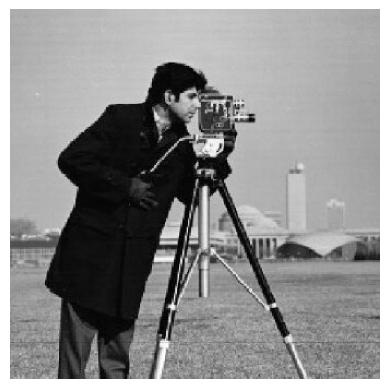

In [5]:
# opening image file
gs_img = Image.open("/content/drive/MyDrive/AL and ML/Workshop 1/cameraman.png")

# Displaying image with Matplotlib
plt.imshow(gs_img, cmap='gray')
plt.axis('off')
plt.show()

2. Extract and display the middle section of the image (150 pixels).
- Extract a 150 pixel section from the center of the image using NumPy array slicing.
- Display this cropped image using matplotlib.

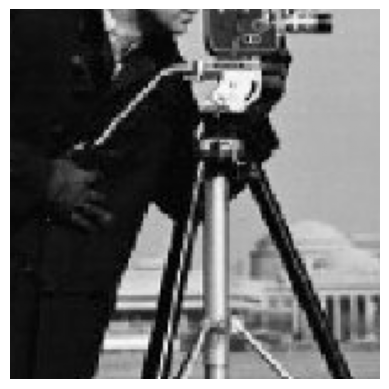

In [6]:
#  Create a array of the image
gs_array = np.array(gs_img)

# extract height and width of the image
height, width = gs_array.shape

# Calculate starting index for a 150x150 crop from the center
start_row = height // 2 - 75
start_col = width // 2 -75

# Extract the central part
center_img = gs_array[start_row:start_row+150, start_col:start_col+150]

# Display the centered image
plt.imshow(center_img, cmap="gray")
plt.axis('off')
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
- Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).
- Display the resulting binary image.

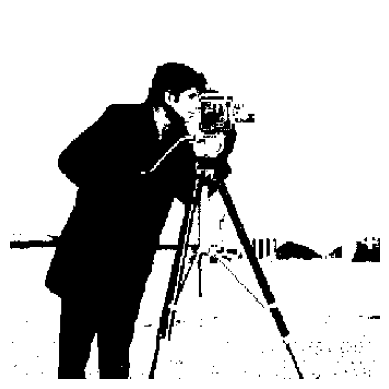

In [7]:
gs_array2 = gs_array

# Create threshold for below 100 and above 100
binary_image = np.where(gs_array2 < 100, 0, 255)

plt.imshow(binary_image, cmap = 'gray')
plt.axis('off')
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.
- Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.
- Display the rotated image using matplotlib.

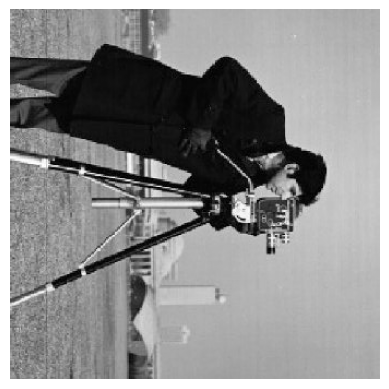

In [8]:
gs_img2 = gs_img

# rotate image
gs_img2 = gs_img2.rotate(-90)

plt.imshow(gs_img2, cmap = 'gray')
plt.axis('off')
plt.show()

5. Convert the grayscale image to an RGB image.
- Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).
- Display the converted RGB image using matplotlib.

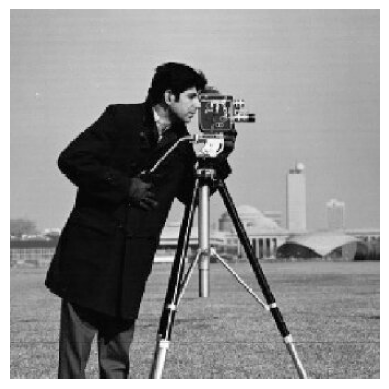

In [9]:
gs_rgb_img = gs_img

# Convert to RGB
rgb_img = gs_rgb_img.convert("RGB")

plt.imshow(rgb_img, cmap='grey')
plt.axis('off')
plt.show()

In [10]:
# Check dimension for RGB
rgb_array = np.array(rgb_img)
rgb_array.shape

(339, 339, 3)

## 3. Image Compression and Decompression using PCA.

In this exercise, build a PCA from scratch using explained variance method for image compression task.
You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
choice.

1. Load and Prepare Data:
- Fetch an image of you choice.{If colour convert to grayscale}


In [11]:
# Convert RGB to Grayscale image
pca_image = image.convert ("L")

# Convert to NumPy array
pca_array = np.array(pca_image)

height, width = pca_array.shape
data = pca_array.reshape (height, width)

- Center the dataset - Standaridze the Data.

In [12]:
# Compute the mean of each column (feature)
mean = np.mean(data, axis=0)

# Subtract mean to center the data
centered_data = data - mean

- Calculate the covaraince matrix of the Standaridze data.

In [13]:
# Compute covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)

2. Eigen Decomposition and Identifying Principal Components:
- Compute Eigen Values and Eigen Vectors.


In [14]:
# Compute eigenvalues and eigenvector
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

- Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.

In [15]:
# Sort eigen values in descending order with largest eigenvalue first
sorted_indices = np.argsort( eigenvalues ) [::-1]
eigenvalues = eigenvalues [sorted_indices]
eigenvector = eigenvectors [:, sorted_indices]

- Identify the Principal Components with the help of cumulative Sum plot.

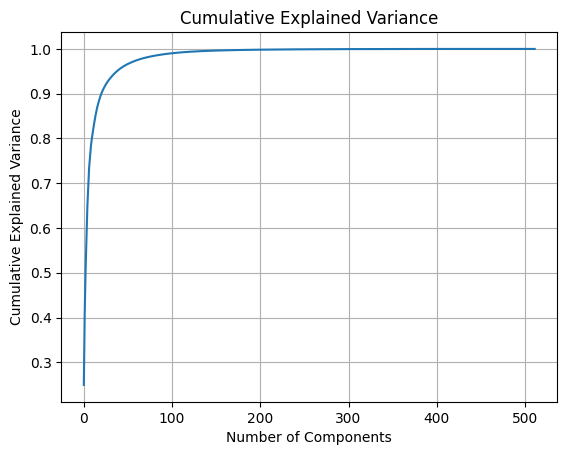

In [16]:
# Plot the cumulatie explainde cariance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative Explained Variance")
plt.xlabel ('Number of Components')
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [19]:
k1 = 10
k2 = 20
k3 = 50
k4 = 100
k5 = 150

components1 = eigenvector [:, :k1]
components2 = eigenvector [:, :k2]
components3 = eigenvector [:, :k3]
components4 = eigenvector [:, :k4]
components5 = eigenvector [:, :k5]



3. Reconstruction and Experiment:

- Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.



- Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

- Display the Results and Evaluate.

In [22]:
compressed_data_one = np.dot (centered_data, components1)
decompressed_data_one = np.dot(compressed_data_one,components1.T) + mean

compressed_data_two = np.dot (centered_data, components2)
decompressed_data_two = np.dot(compressed_data_two,components2.T) + mean

compressed_data_three = np.dot (centered_data, components3)
decompressed_data_three = np.dot(compressed_data_three,components3.T) + mean

compressed_data_four = np.dot (centered_data, components4)
decompressed_data_four = np.dot(compressed_data_four,components4.T) + mean

compressed_data_five = np.dot (centered_data, components5)
decompressed_data_five = np.dot(compressed_data_five,components5.T) + mean

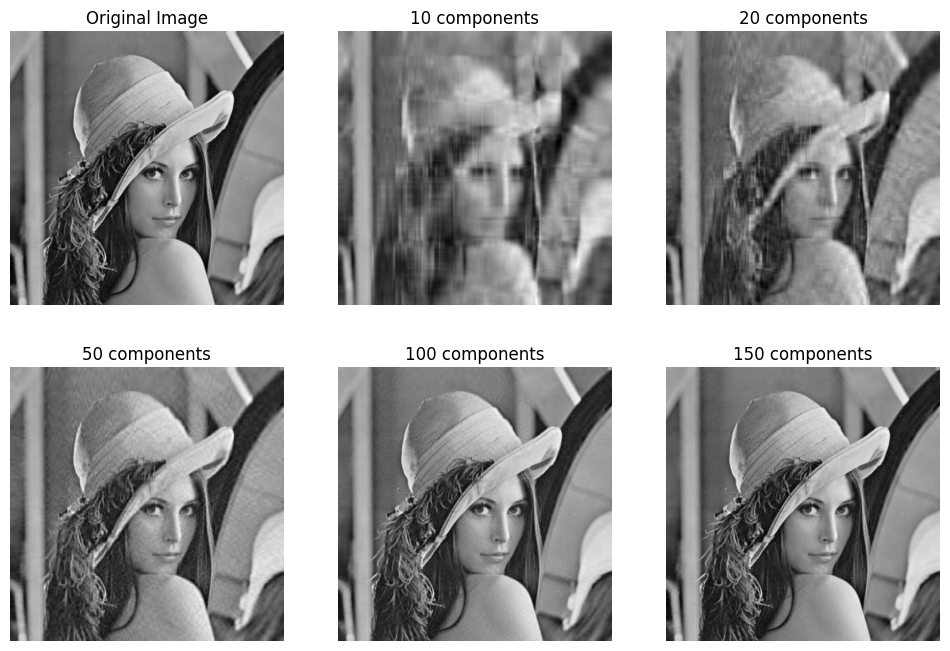

In [26]:
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(pca_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(decompressed_data_one, cmap='gray')
plt.title(f"{k1} components")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(decompressed_data_two, cmap='gray')
plt.title(f"{k2} components")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(decompressed_data_three, cmap='gray')
plt.title(f"{k3} components")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(decompressed_data_four, cmap='gray')
plt.title(f"{k4} components")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(decompressed_data_five, cmap='gray')
plt.title(f"{k5} components")
plt.axis("off")

plt.show()